In [52]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

##  KNN helps to predict whether the person has diabetes or not

from sklearn.neighbors import KNeighborsClassifier

In [53]:
df=pd.read_csv('D://diabetes2.csv',sep=',')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
print(len(df))
df.head()


768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
## REPLACE Zeroes cause there's nothing like 0 insulin or Blood Pressure


zero_not_accepted=['Glucose','BloodPressure','Insulin','BMI','SkinThickness']
for column in zero_not_accepted:

    df[column]=df[column].replace(0,np.NaN)
    
    mean=int(df[column].mean(skipna=True))
    
    df[column]=df[column].replace(np.NaN,mean)

In [56]:
print(df['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [57]:
# Before moving further we will split the dataset to test and train.
# split data

X=df.iloc[:,0:8]
Y=df.iloc[:,8]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [58]:
#Feature scaling

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [59]:
import math
math.sqrt(len(Y_test))

#Since output is even we want odd neighbors so we will take n=12-1=11


12.409673645990857

In [60]:
# define the model
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [61]:
# Predict the test set results
Y_pred=classifier.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [62]:
# Evaluate model
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(f1_score(Y_test,Y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [63]:
print(accuracy_score(Y_test,Y_pred))

0.8181818181818182


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFF9533C48>,
      dtype=object)

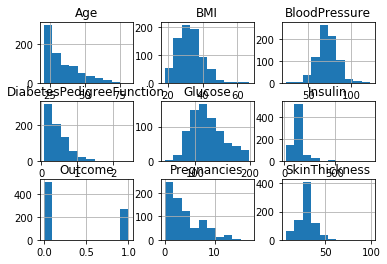

In [68]:

df.hist()